In [1]:
import dataAck
import portfolio
allTickers = dataAck.getAllTickersPlain()
import random
tickerToTrade = allTickers[random.randint(0, len(allTickers)) - 1]
print(tickerToTrade)

tData = dataAck.getTrainingData(tickerToTrade)
joinedData = None
validTickers = None



if tData is None:

    tickersToPull = dataAck.getDataSourcesForTicker(tickerToTrade)
    print(tickersToPull)

    pulledData, validTickers = dataAck.downloadTickerData(tickersToPull)

    joinedData = dataAck.joinDatasets([pulledData[ticker] for ticker in pulledData])

    dataAck.storeTrainingData(tickerToTrade, (joinedData, validTickers))



IVV
ATTEMPTING PULL IVV


In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
tData[0].plot(figsize=(20,10))

In [3]:
from sklearn.preprocessing import MinMaxScaler
agg_arr = tData[0][["Adj_Close_AGG"]].dropna().values

In [109]:
xVals = []
yVals = []
predictionDistance = 10
lookbackDistance = 22
percentileMove = 10
for i in range(len(agg_arr) - lookbackDistance - lookbackDistance - predictionDistance):
    xVals.append(MinMaxScaler().fit_transform(agg_arr[i:i+lookbackDistance]).flatten())
    ##SKIP LOOKBACK DISTANCE * 2 TO AVOID ANY OVERLAP WITH ANYTHING IN TRAINING
    targetArr = agg_arr[i+lookbackDistance + lookbackDistance:i+lookbackDistance+lookbackDistance+predictionDistance]
    yVals.append((targetArr[-1] - targetArr[0])/targetArr[0])

In [110]:
from sklearn.neighbors import NearestNeighbors

In [111]:
nn = NearestNeighbors(n_neighbors=5, p=2, n_jobs = -1)

In [112]:
nn.fit(xVals[:2000])

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=-1, n_neighbors=5, p=2, radius=1.0)

In [113]:
minSwingToCount = np.array([abs(item) for item in yVals])
minSwingToCount = np.percentile(minSwingToCount, percentileMove)
minSwingToCount

0.00082837096106143338

In [114]:
def ensureNoShifts(nearestIndicies):
    breadth = 5
    keptIndicies = []
    for item in nearestIndicies:
        k = item-breadth
        shouldAdd = True
        while k < item + breadth:
            if k in keptIndicies:
                shouldAdd = False
                break
            k += 1
        if shouldAdd == True:
            keptIndicies.append(item)
    return keptIndicies

TARGET 0.4 0.6 [ 0.0025762]


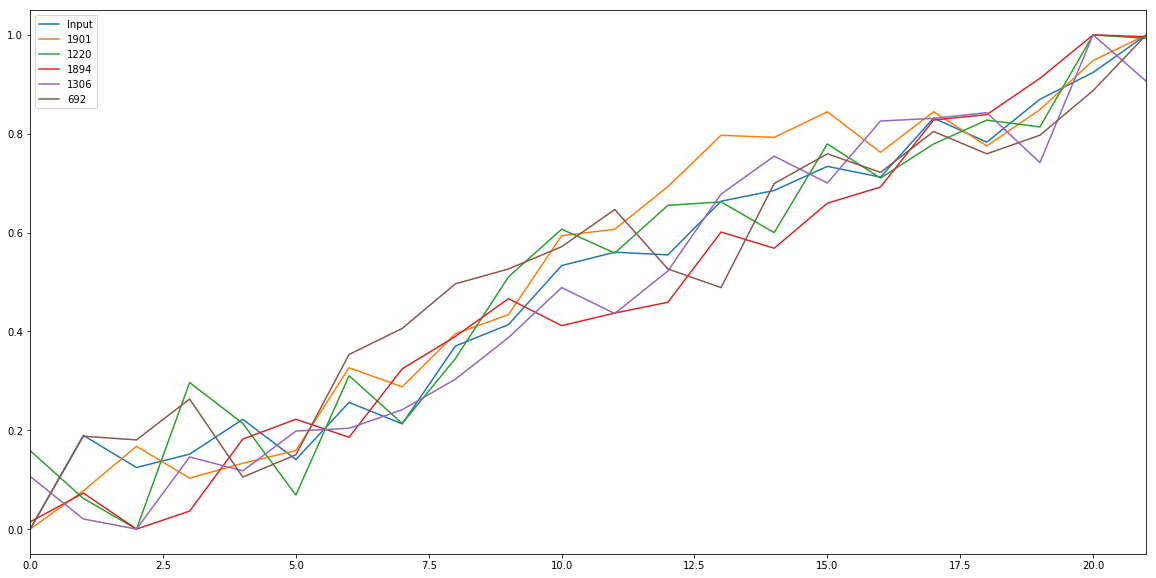

0.0 1.0
TARGET 0.3333333333333333 0.6666666666666666 [ 0.00141207]


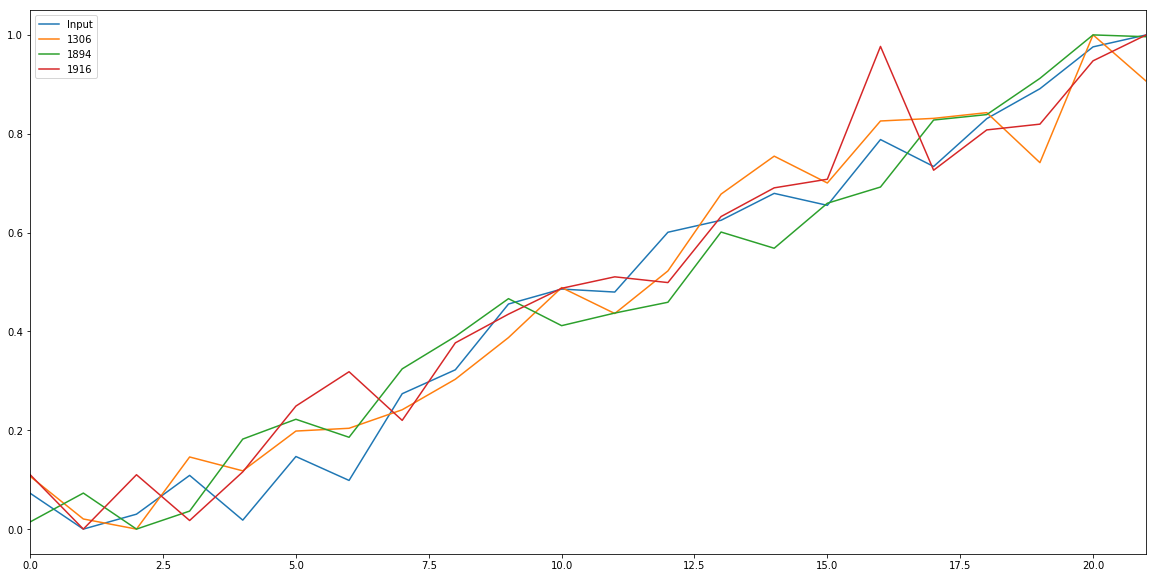

0.0 2.0
TARGET 0.3333333333333333 0.6666666666666666 [-0.00055456]


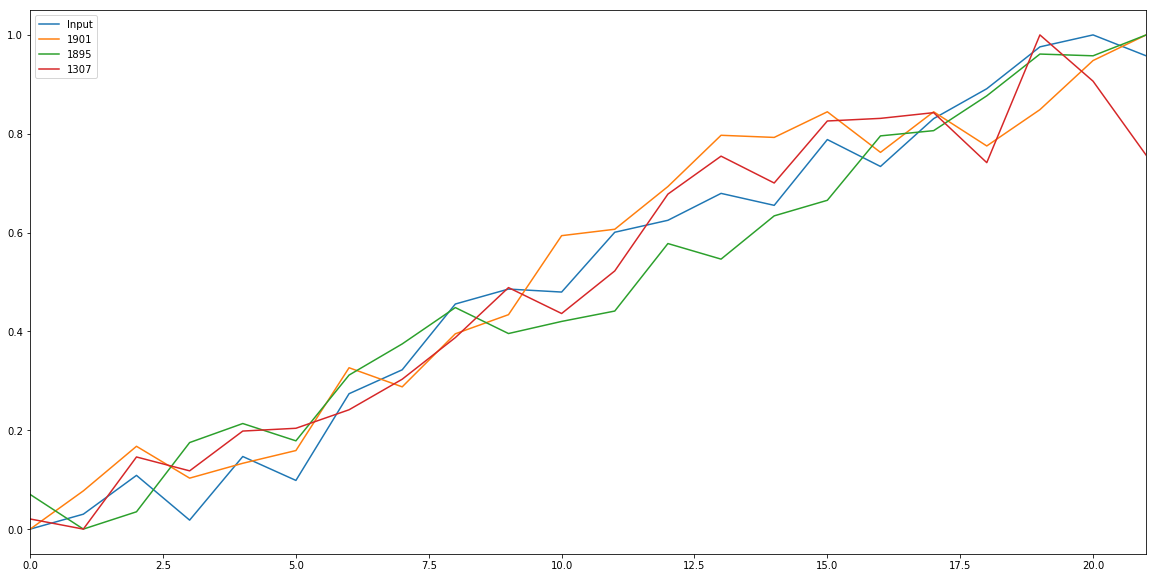

0.3333333333333333 3.0
TARGET 0.6 0.4 [-0.00145202]


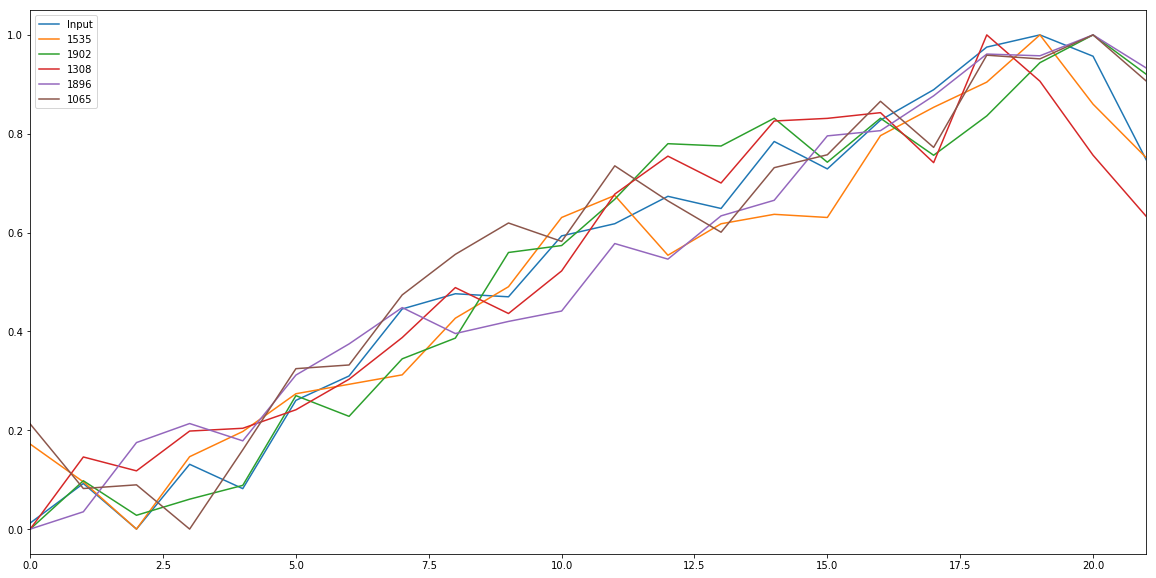

0.25 4.0
TARGET 0.6 0.0 [ 0.00024954]


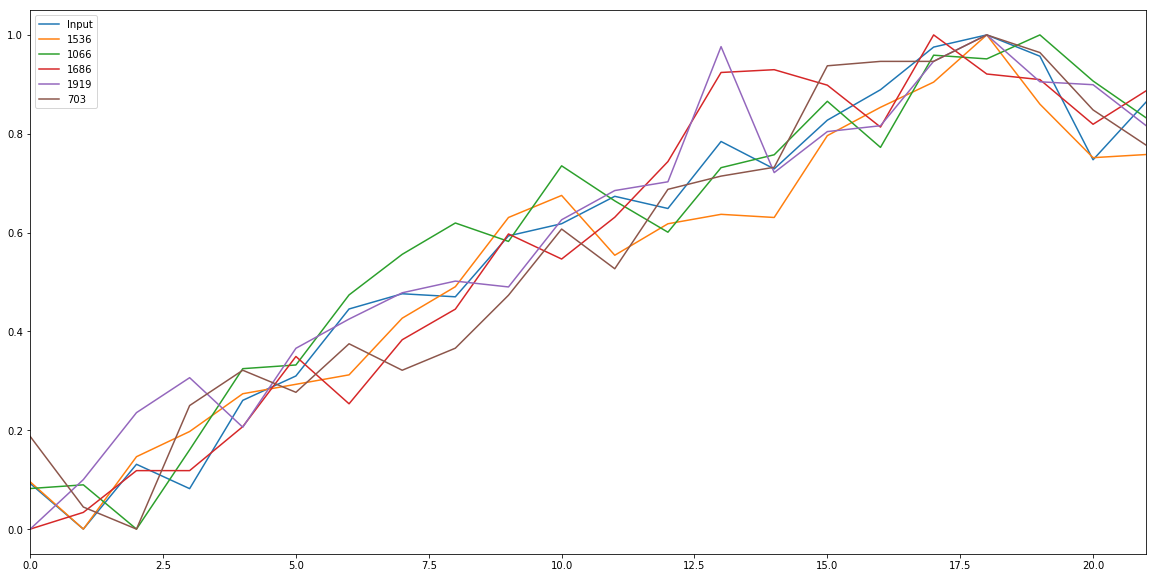

0.4 5.0
TARGET 0.8 0.2 [-0.00696755]


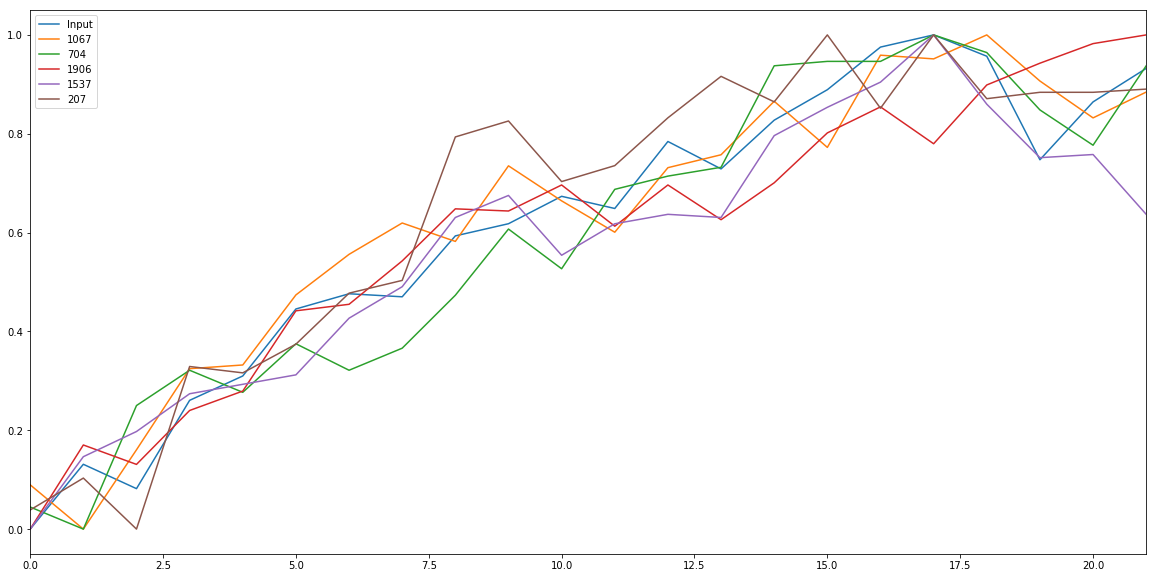

0.3333333333333333 6.0
TARGET 0.6666666666666666 0.0 [-0.00517257]


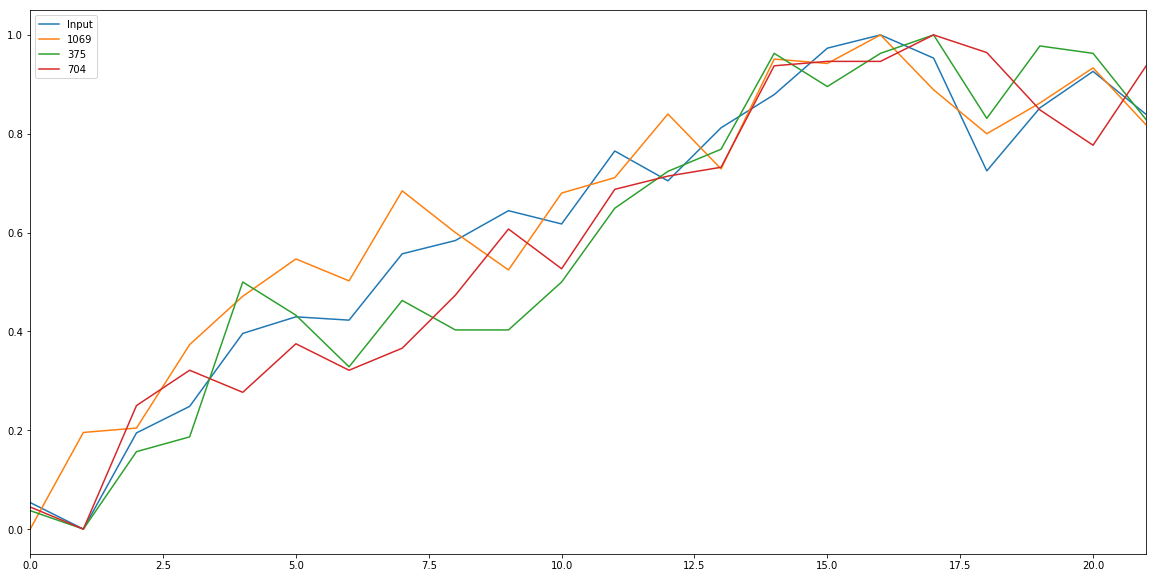

0.2857142857142857 7.0
TARGET 0.6666666666666666 0.0 [-0.00454829]


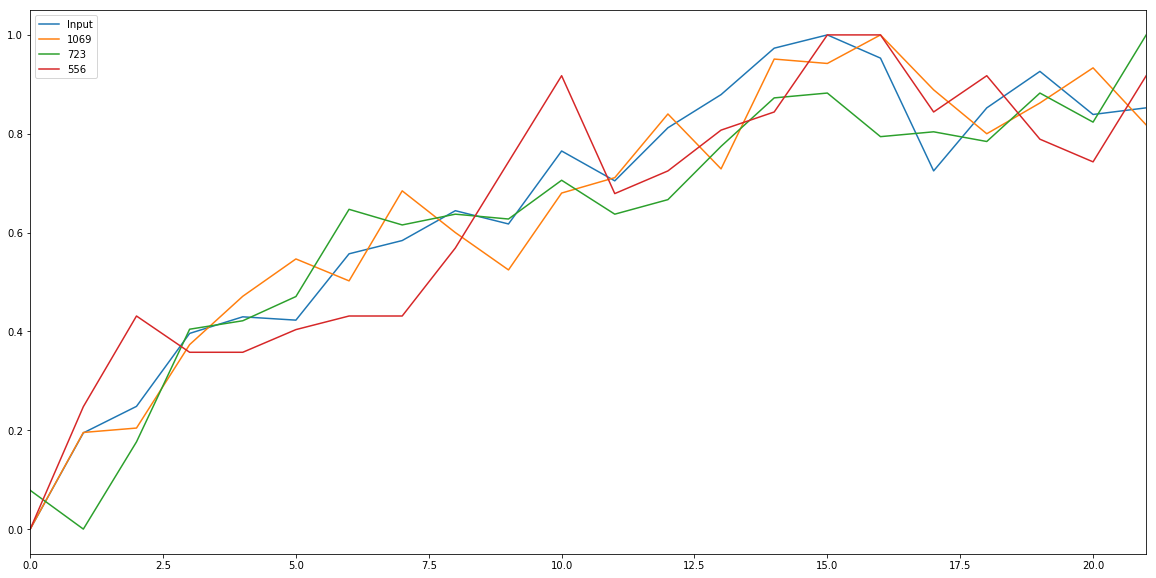

0.25 8.0
0.25 8.0
TARGET 0.75 0.25 [-0.00107248]


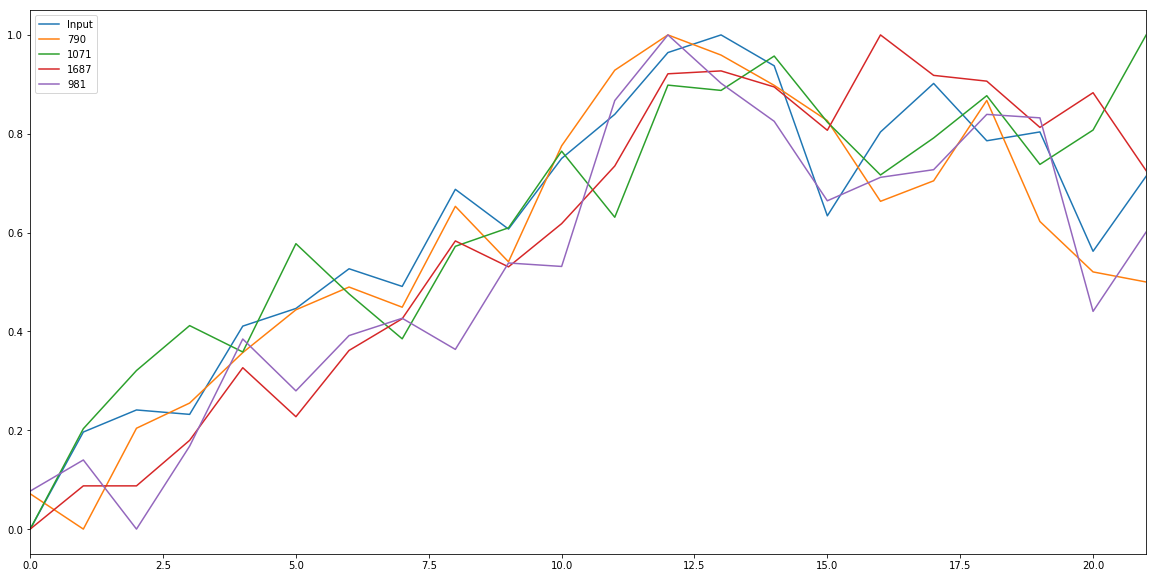

0.2222222222222222 9.0
0.2222222222222222 9.0
TARGET 0.8 0.2 [ 0.00259438]


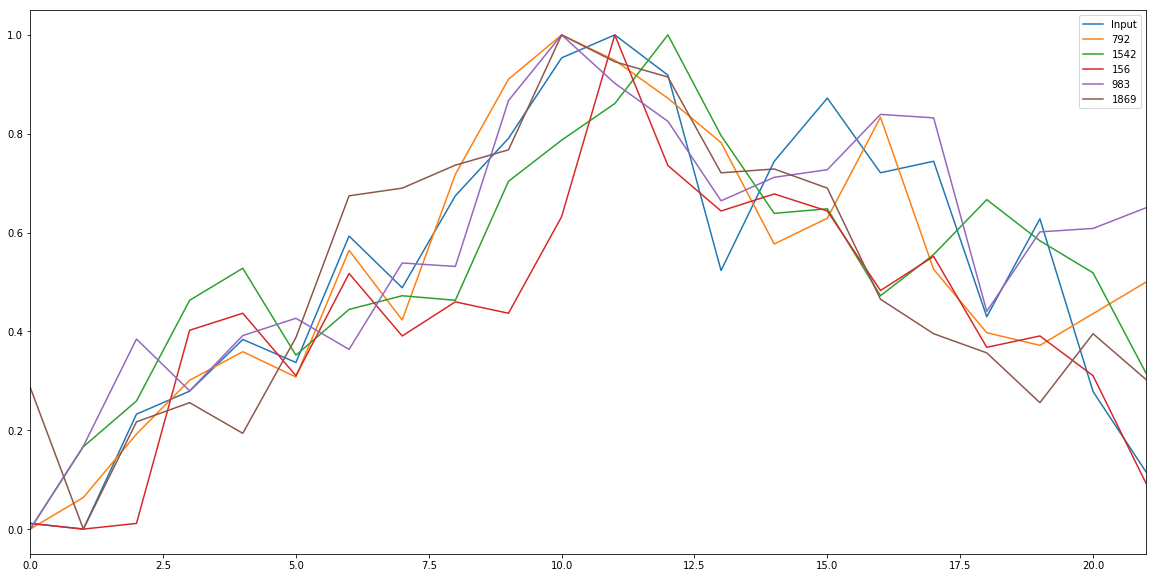

0.3 10.0
TARGET 0.8 0.2 [ 0.00609483]


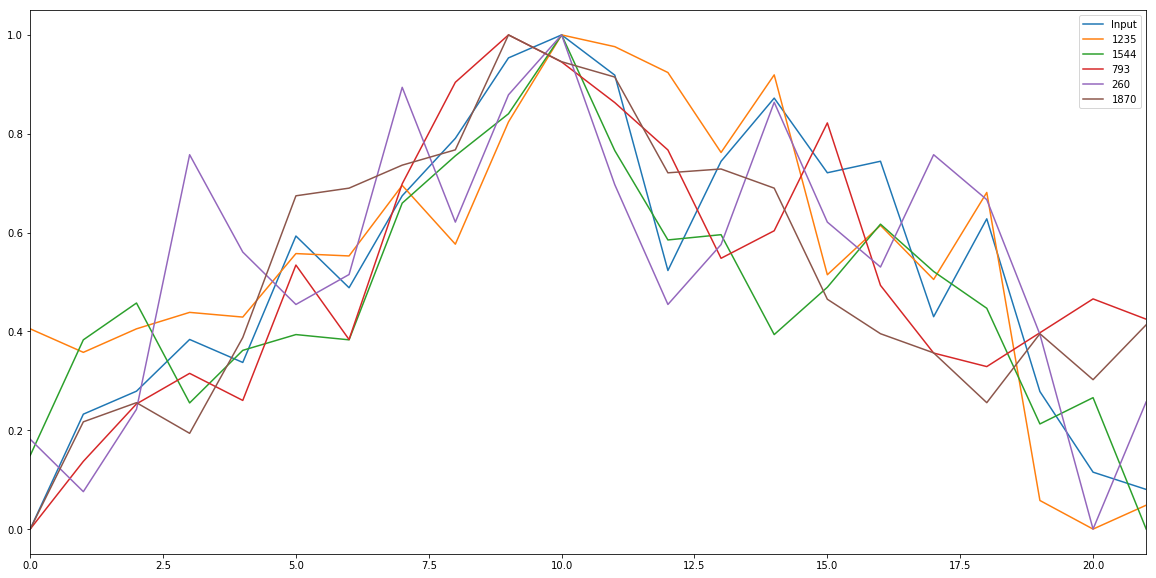

0.36363636363636365 11.0
0.36363636363636365 11.0
TARGET 0.8 0.2 [ 0.00826075]


0.4166666666666667 12.0
TARGET 1.0 0.0 [ 0.0080502]


0.46153846153846156 13.0
TARGET 0.75 0.25 [ 0.00705028]


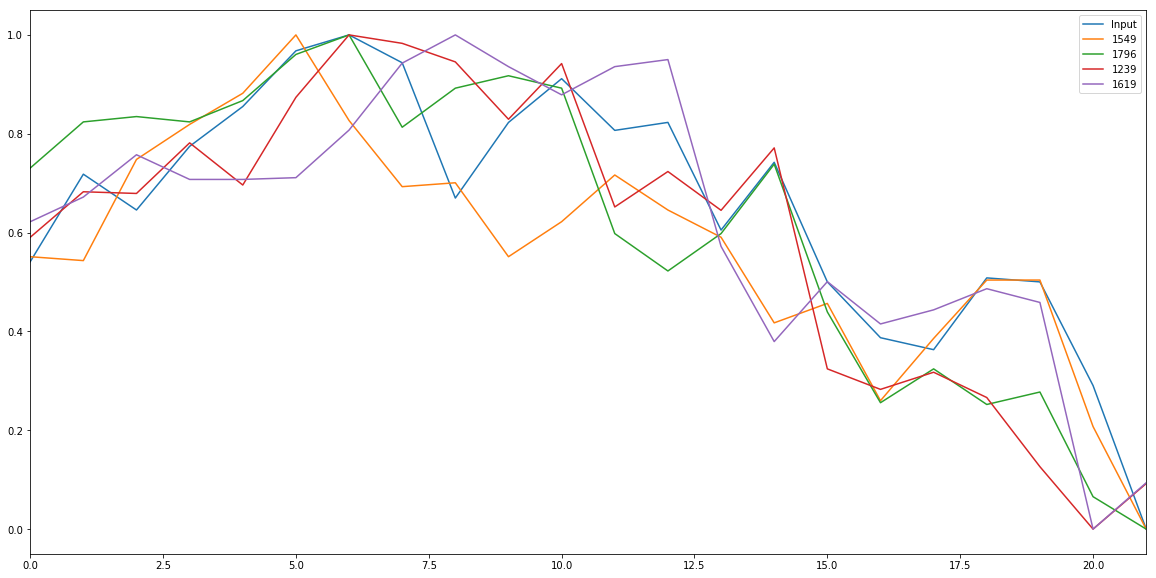

0.5 14.0
TARGET 0.8 0.2 [ 0.00587552]


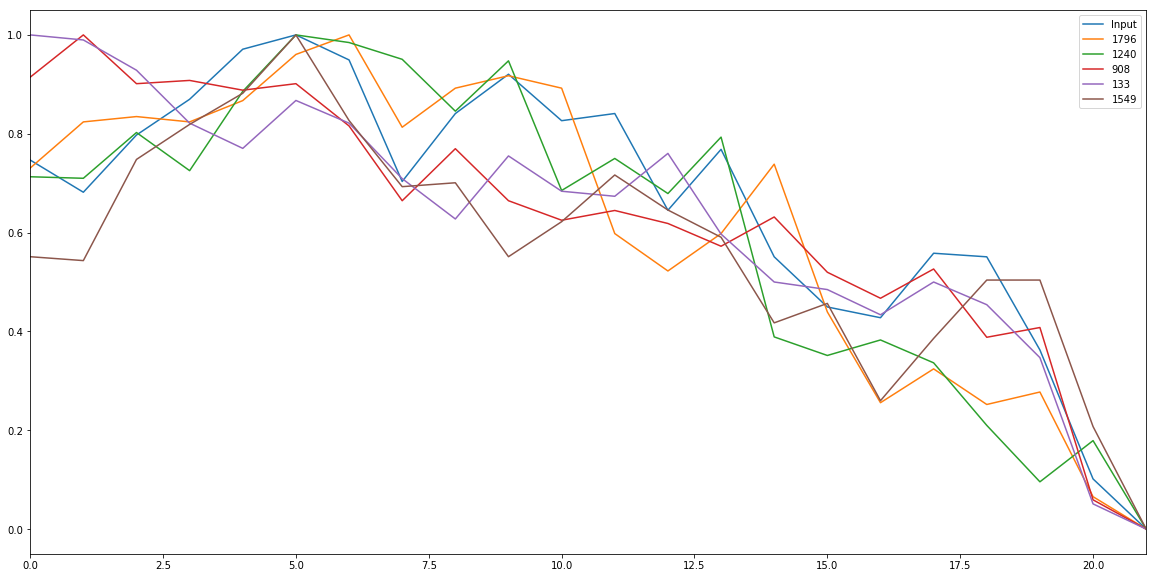

0.5333333333333333 15.0
TARGET 0.6 0.2 [ 0.00614695]


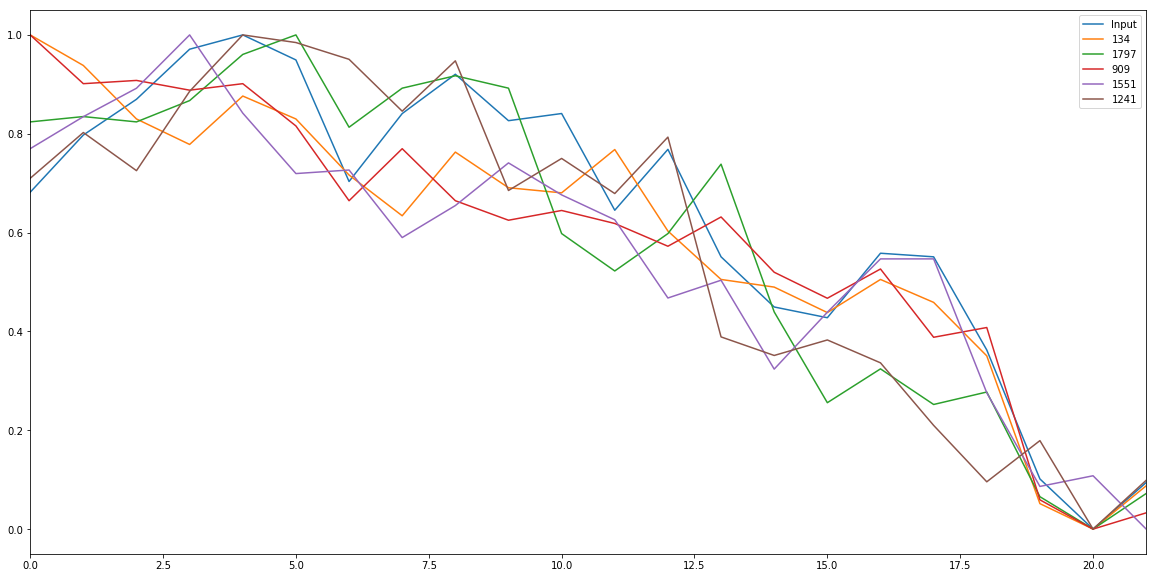

0.5625 16.0
TARGET 0.6666666666666666 0.3333333333333333 [ 0.00309736]


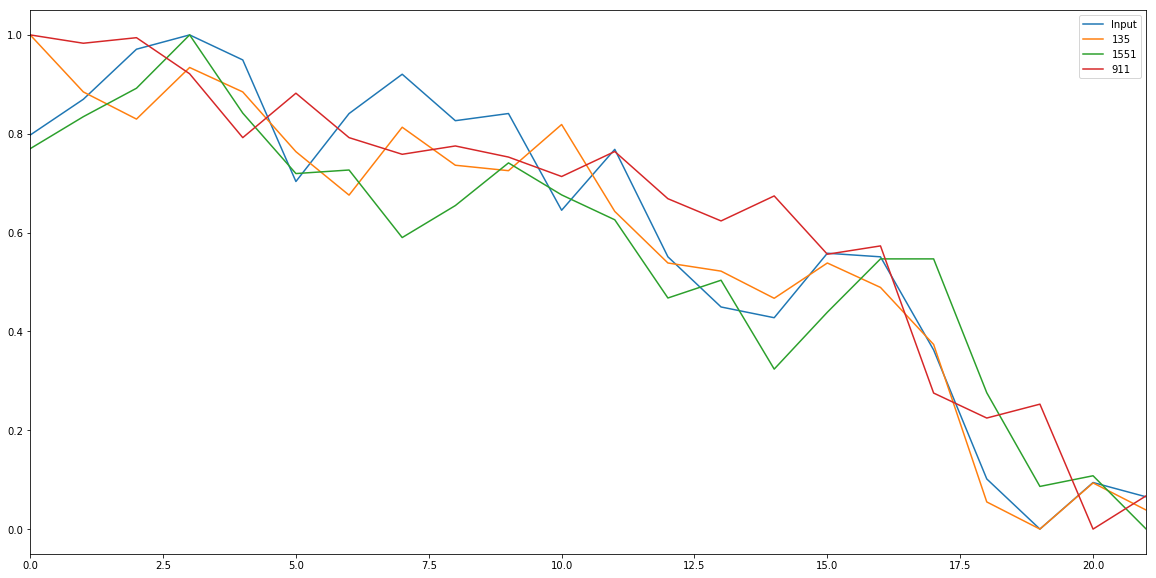

0.5882352941176471 17.0
TARGET 1.0 0.0 [ -3.27931407e-05]


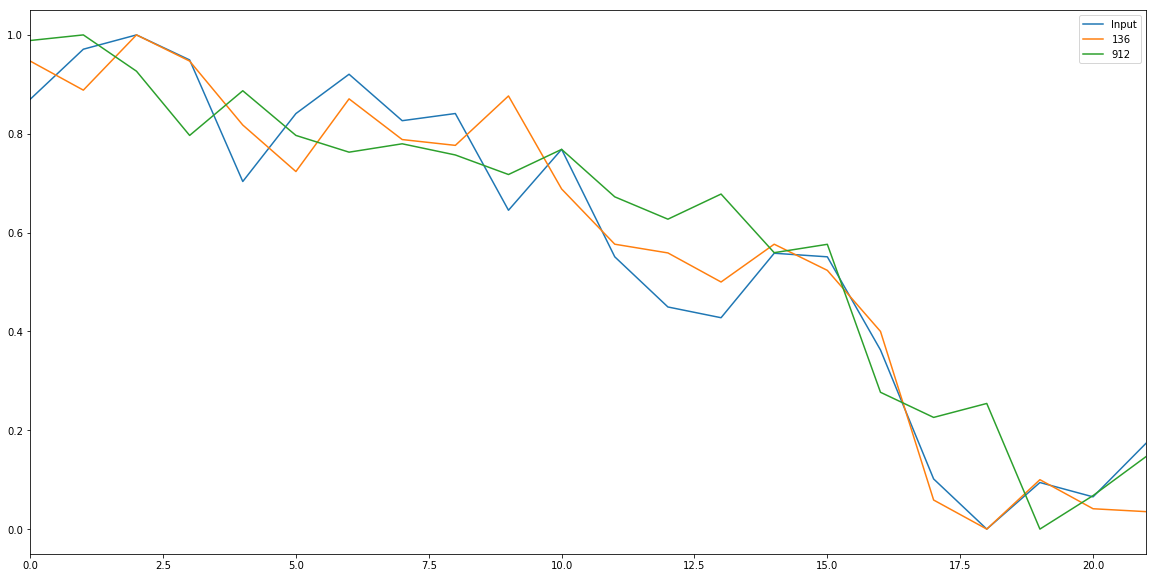

0.5555555555555556 18.0
TARGET 0.6666666666666666 0.3333333333333333 [-0.00011903]


0.5263157894736842 19.0
TARGET 1.0 0.0 [-0.00216788]


0.5 20.0
TARGET 0.75 0.0 [  6.01042469e-05]


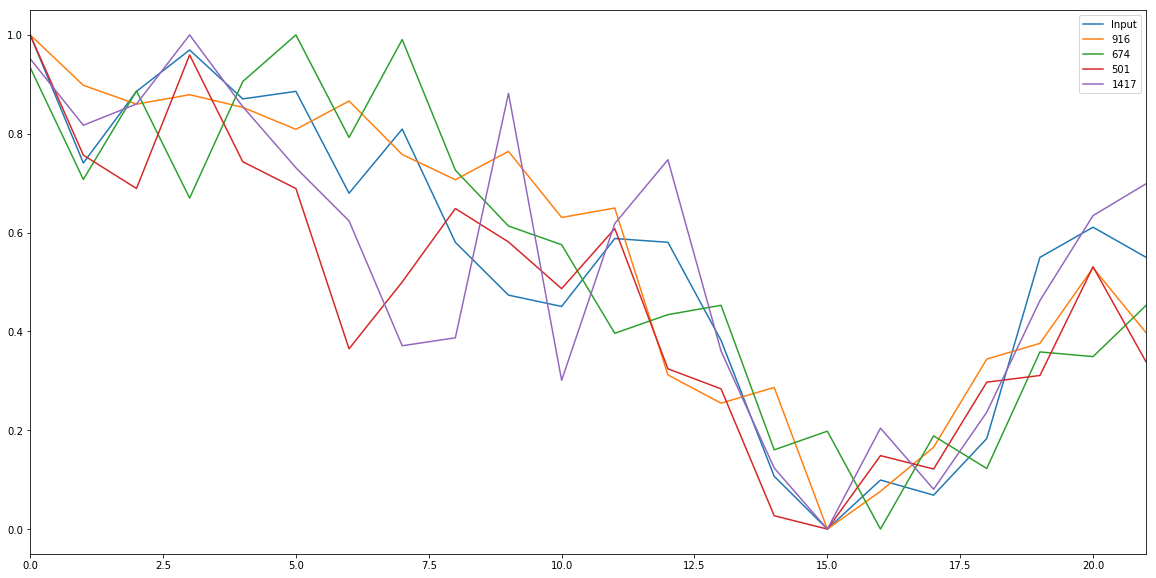

0.5238095238095238 21.0
TARGET 0.75 0.25 [ -9.77577657e-05]


0.5 22.0
0.5 22.0
TARGET 1.0 0.0 [ 0.0008015]


0.5217391304347826 23.0
TARGET 1.0 0.0 [-0.00044543]


0.5 24.0
TARGET 0.75 0.25 [-0.00214114]


0.48 25.0
0.48 25.0
TARGET 0.75 0.25 [-0.00071409]


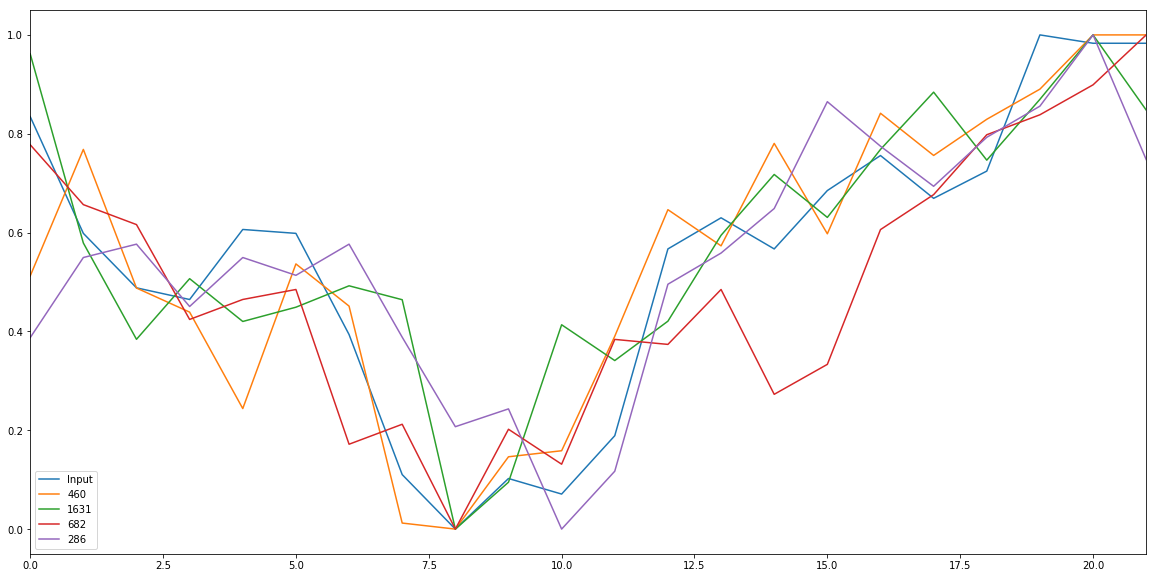

0.46153846153846156 26.0
0.46153846153846156 26.0
TARGET 0.75 0.25 [-0.00035686]


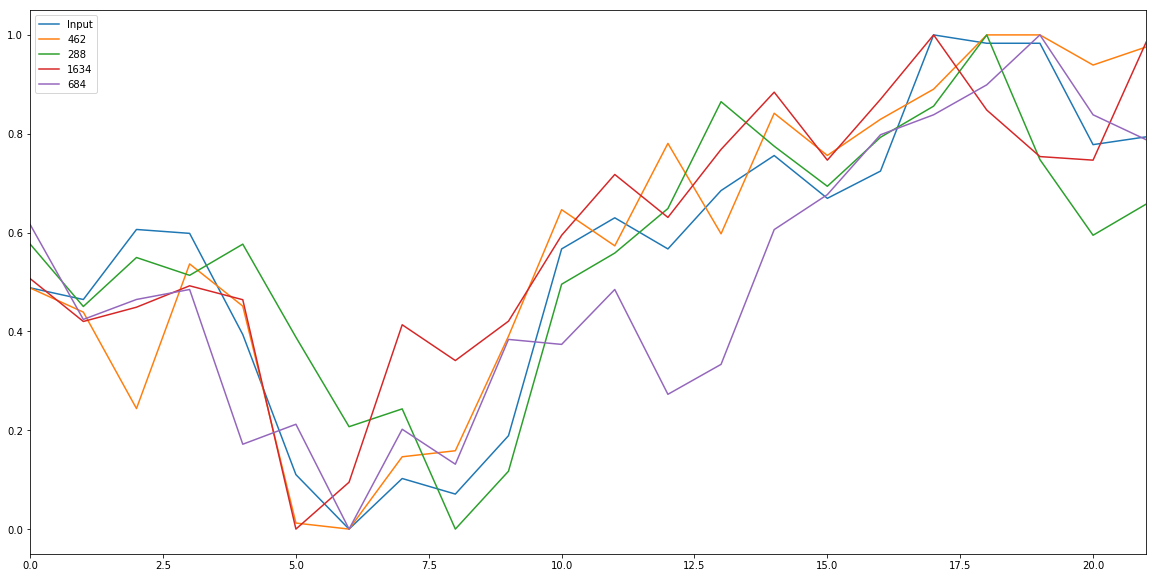

0.4444444444444444 27.0
TARGET 0.75 0.25 [-0.00231667]


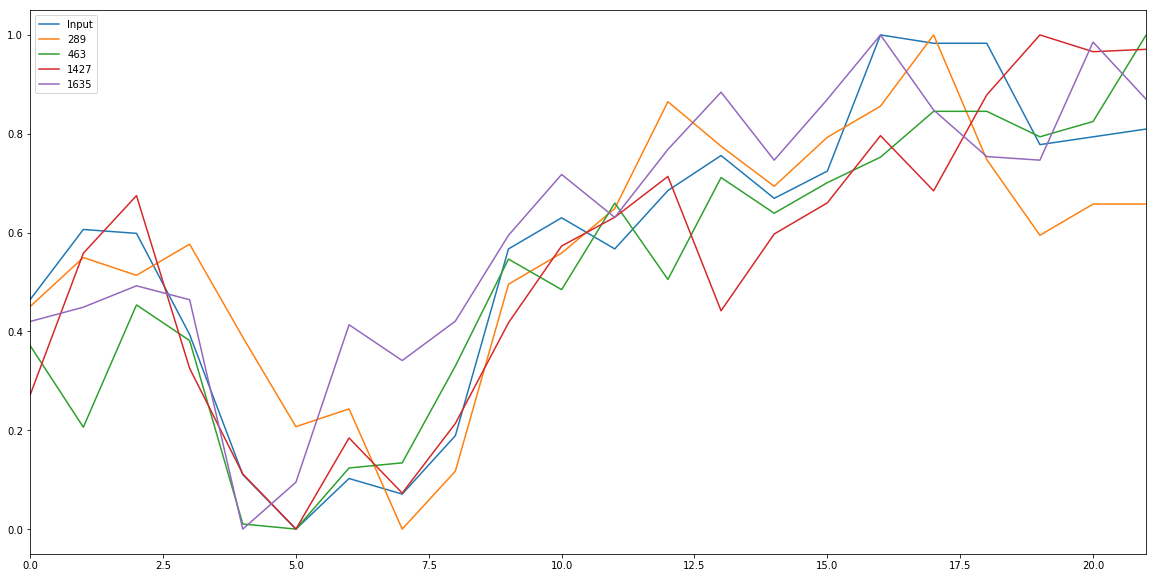

0.42857142857142855 28.0
TARGET 1.0 0.0 [-0.00525285]


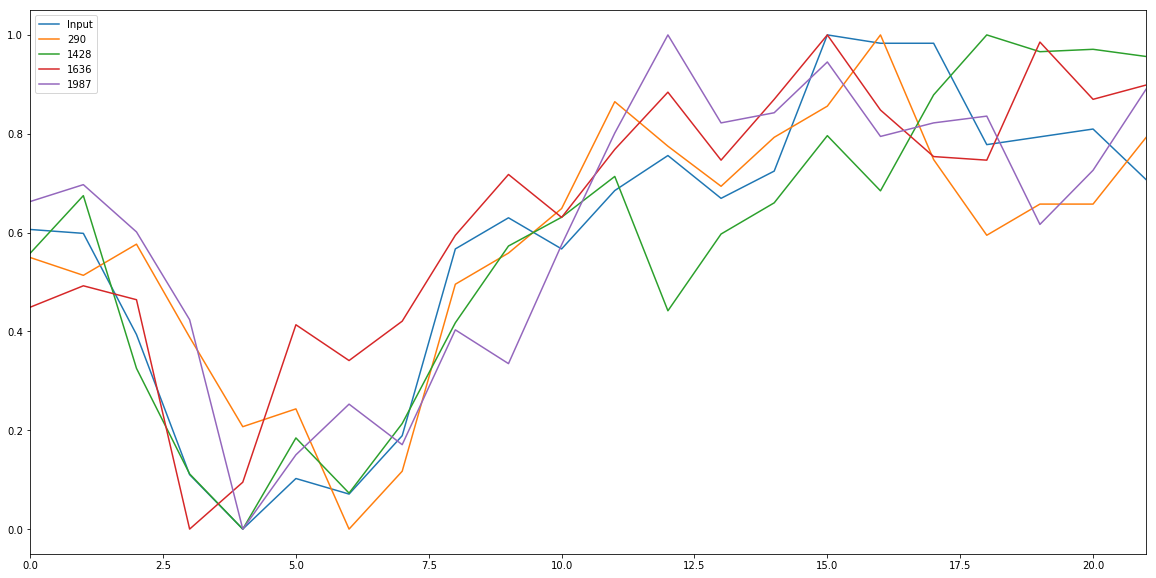

0.41379310344827586 29.0
TARGET 0.75 0.25 [-0.00311443]


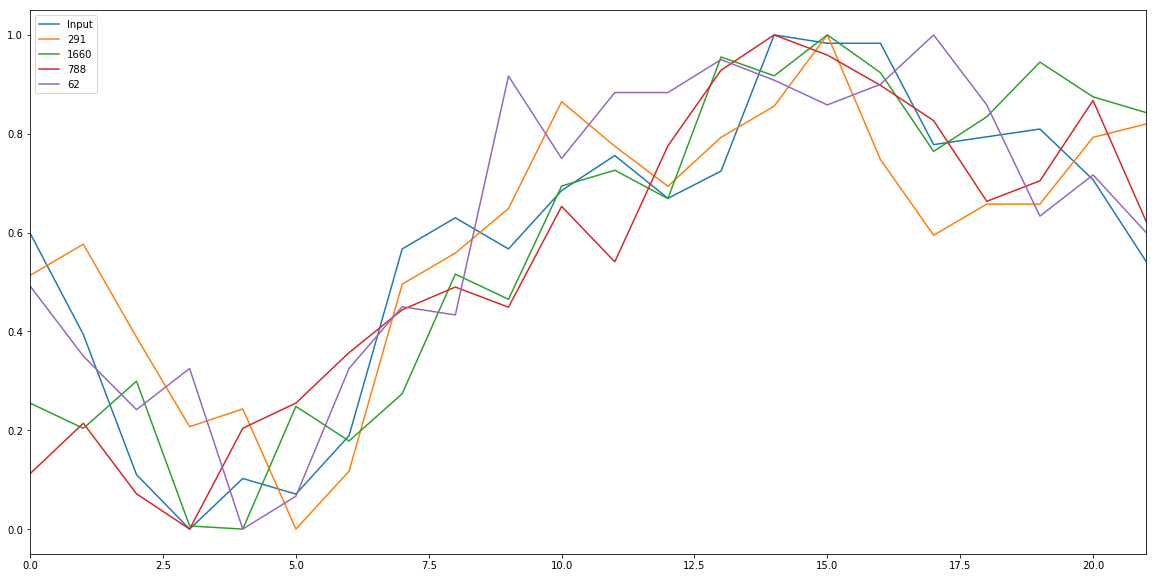

0.4 30.0
TARGET 0.75 0.0 [ -8.91265597e-05]


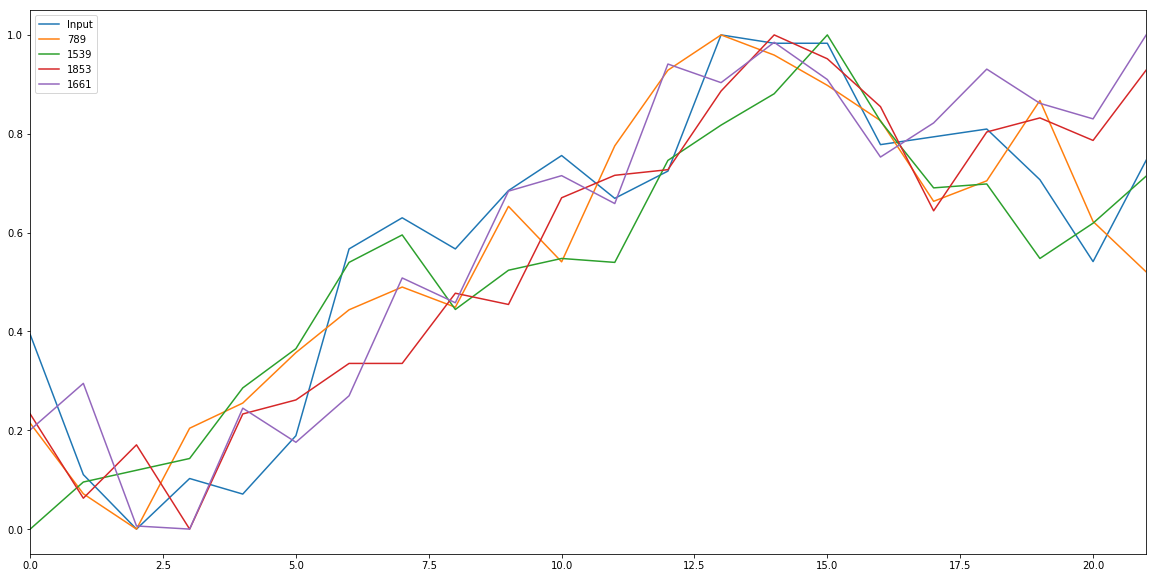

0.3870967741935484 31.0
TARGET 0.75 0.25 [ 0.00172214]


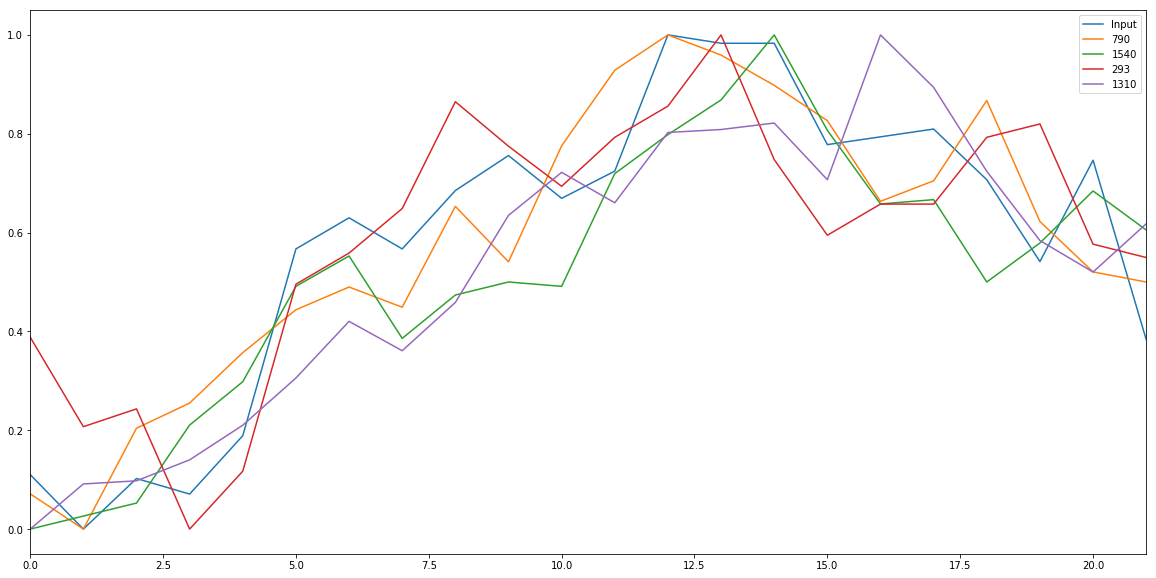

0.40625 32.0
TARGET 1.0 0.0 [ 0.00270255]


0.42424242424242425 33.0
TARGET 1.0 0.0 [ 0.00315485]


0.4411764705882353 34.0
0.4411764705882353 34.0
0.4411764705882353 34.0
0.4411764705882353 34.0
0.4411764705882353 34.0
TARGET 0.3333333333333333 0.6666666666666666 [ 0.00234905]


0.42857142857142855 35.0
TARGET 0.75 0.0 [ 0.00267841]


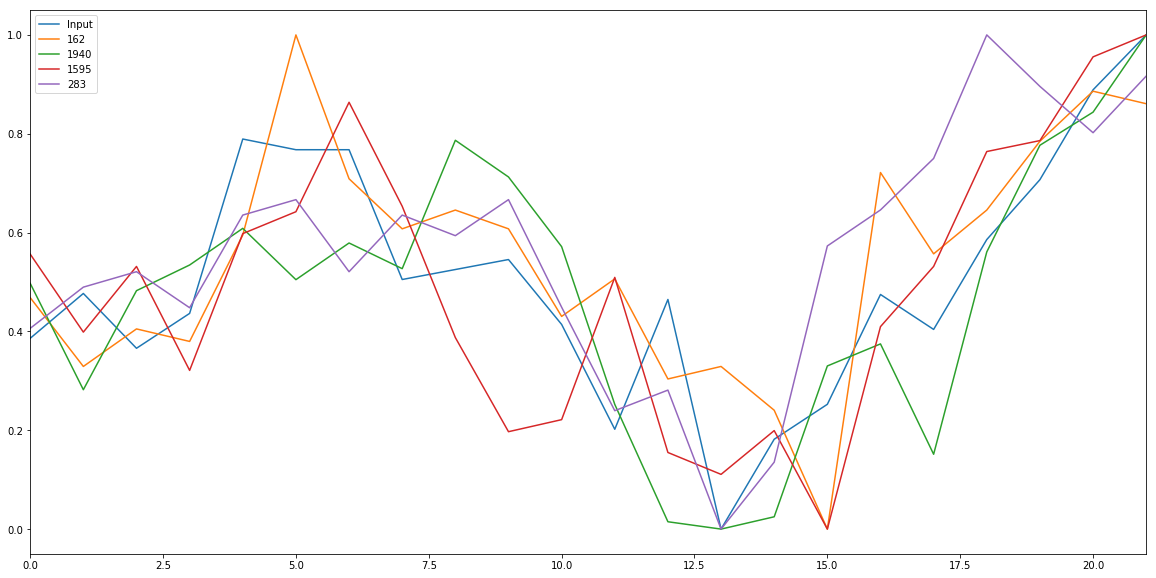

0.4444444444444444 36.0
TARGET 0.75 0.25 [ 0.00429338]


0.4594594594594595 37.0
TARGET 1.0 0.0 [ 0.00268706]


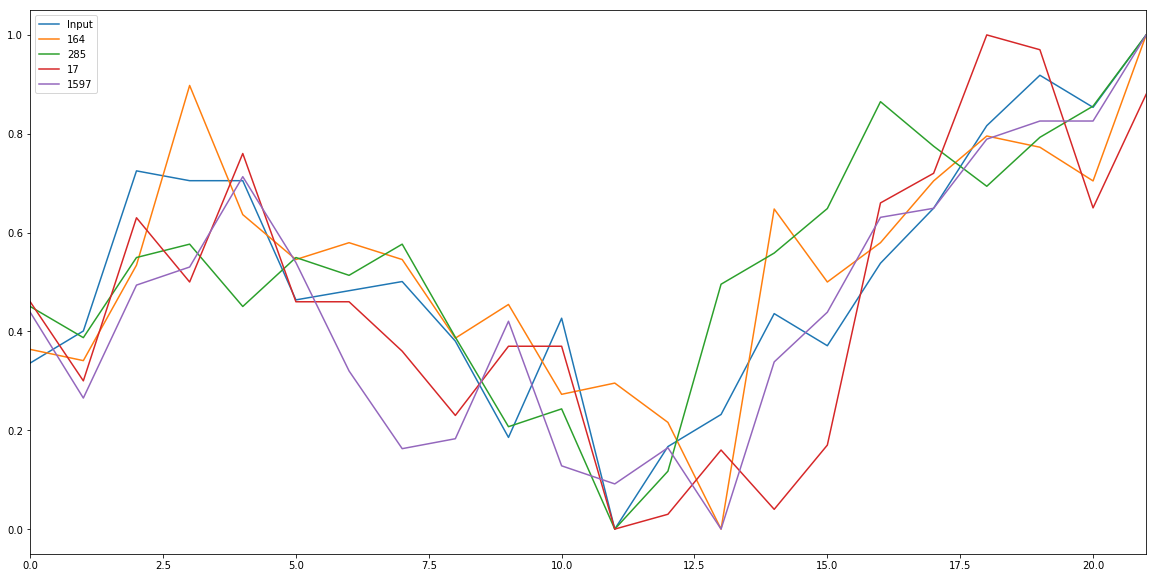

0.47368421052631576 38.0
TARGET 0.8 0.2 [ 0.00133857]


0.48717948717948717 39.0
TARGET 0.8 0.2 [ 0.00492214]


0.5 40.0
TARGET 0.8 0.2 [ 0.00071429]


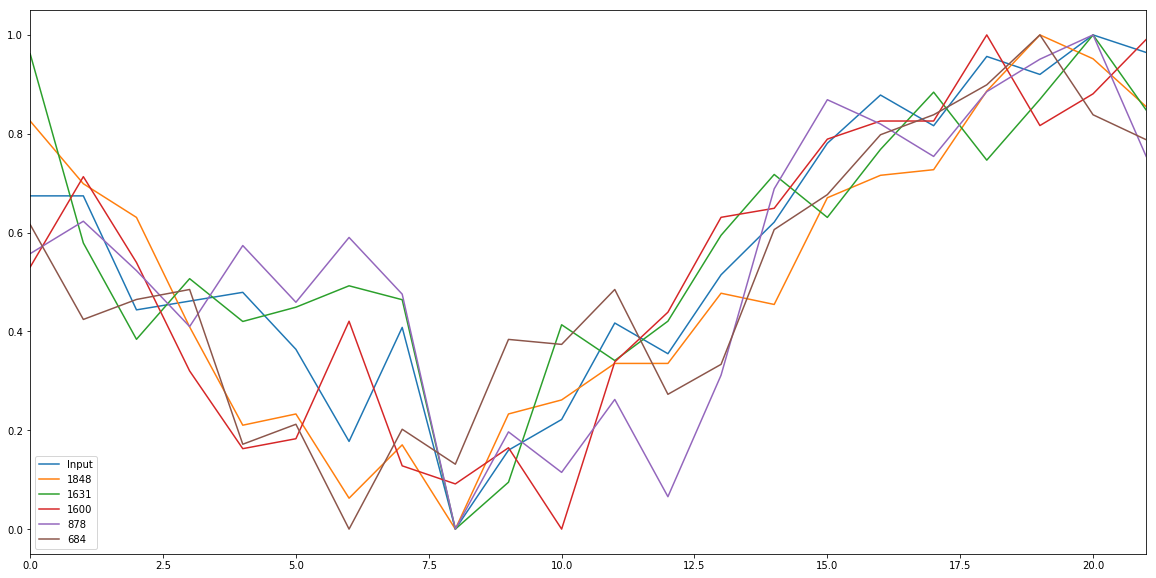

0.5121951219512195 41.0
0.5121951219512195 41.0
TARGET 0.75 0.25 [-0.00107066]


0.5 42.0
TARGET 0.75 0.25 [-0.00044623]


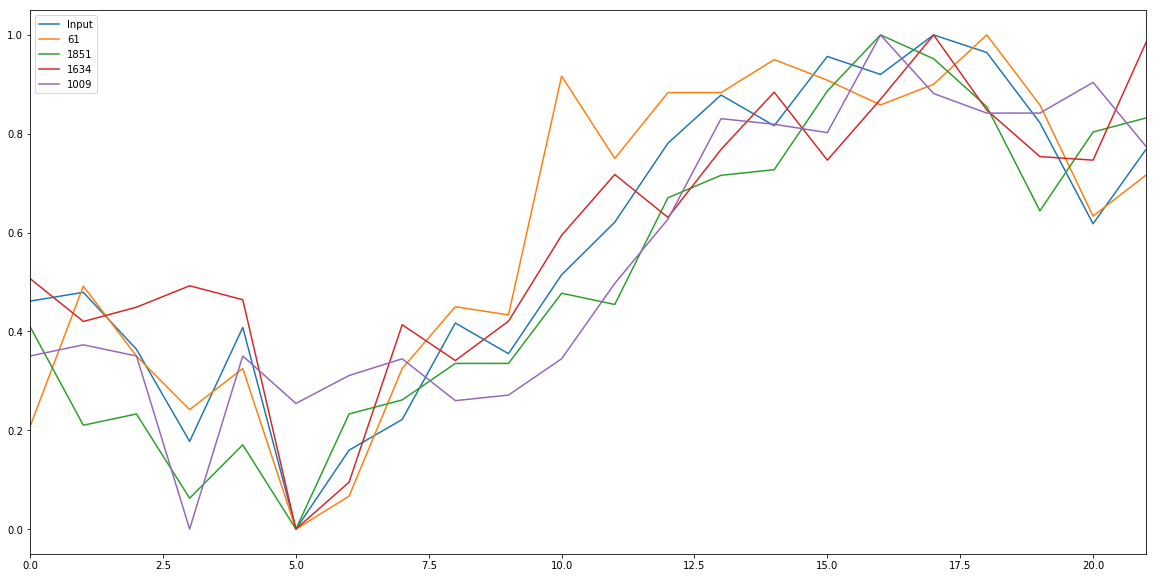

0.4883720930232558 43.0
TARGET 0.8 0.2 [-0.00086328]


0.4772727272727273 44.0
TARGET 1.0 0.0 [-0.00097969]


0.4666666666666667 45.0
TARGET 0.8 0.0 [ 0.00124811]


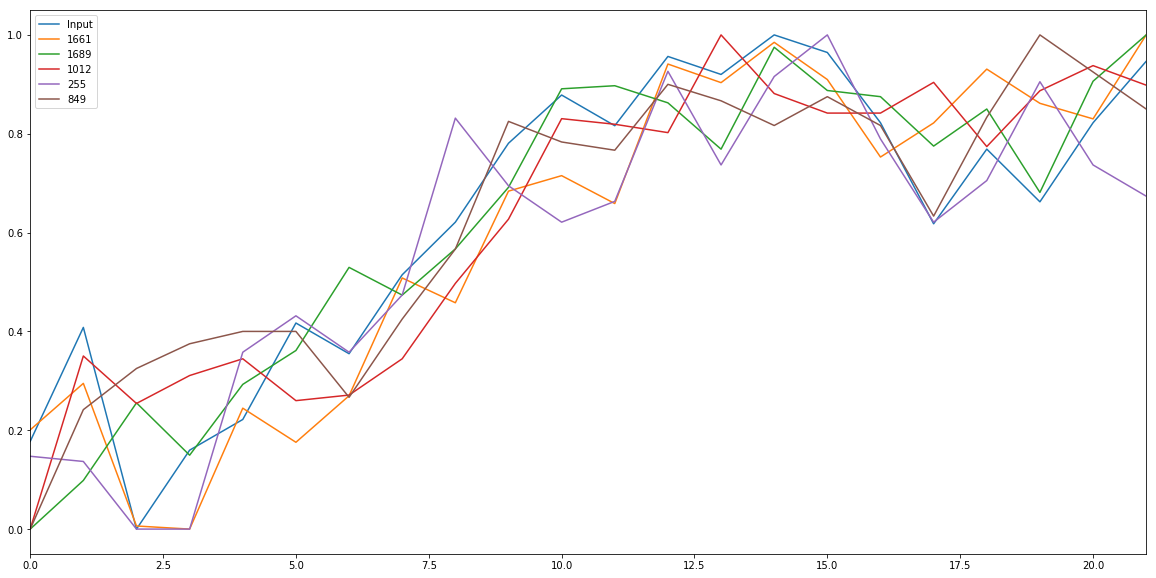

0.4782608695652174 46.0
TARGET 0.8 0.0 [ 0.00035647]


0.48936170212765956 47.0
TARGET 1.0 0.0 [-0.00020965]


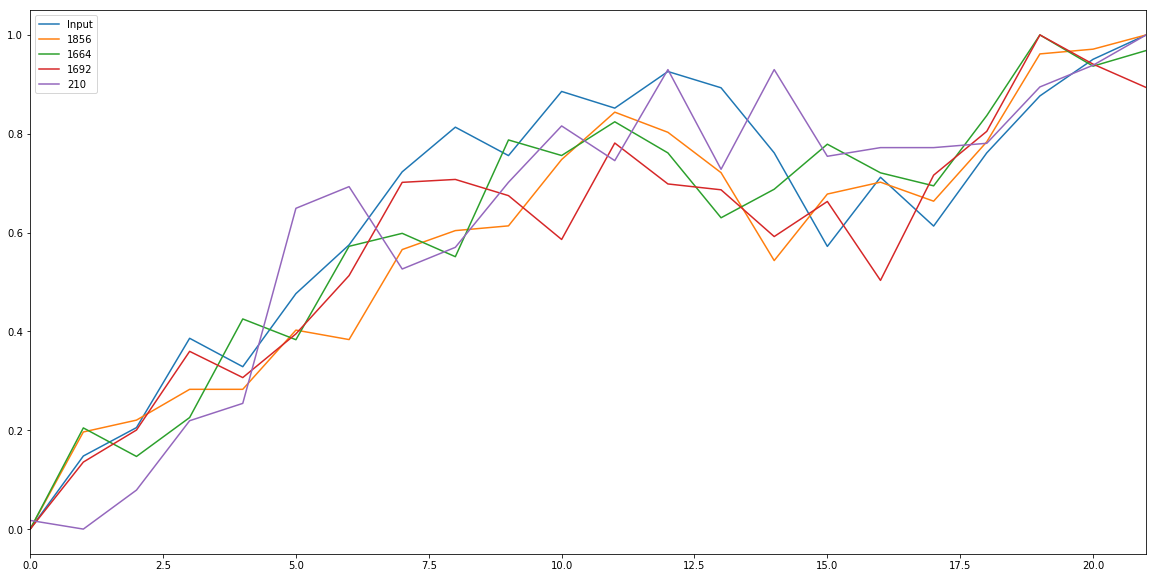

0.4791666666666667 48.0
TARGET 1.0 0.0 [ 0.0022919]


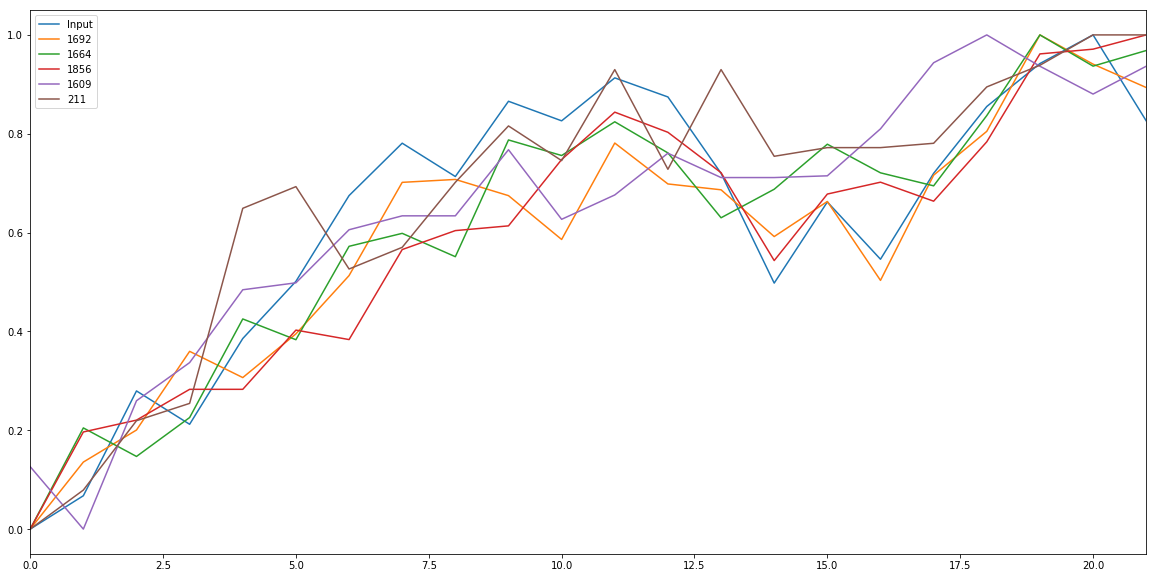

0.4897959183673469 49.0
0.4897959183673469 49.0
0.4897959183673469 49.0
0.4897959183673469 49.0
TARGET 0.25 0.75 [ 0.001756]


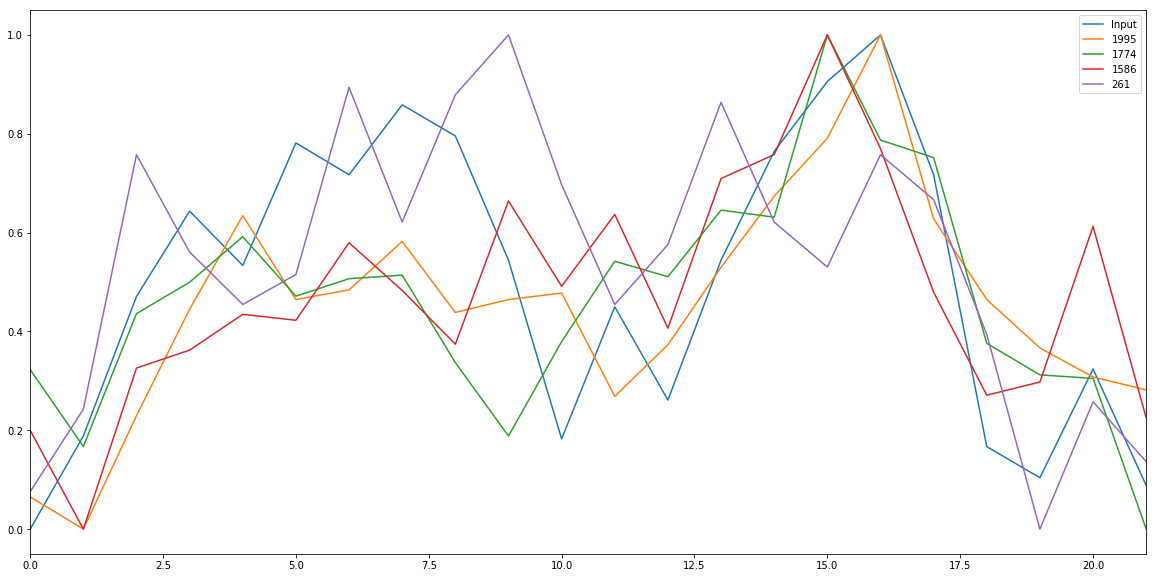

0.48 50.0
TARGET 0.2 0.6 [ 0.00121866]


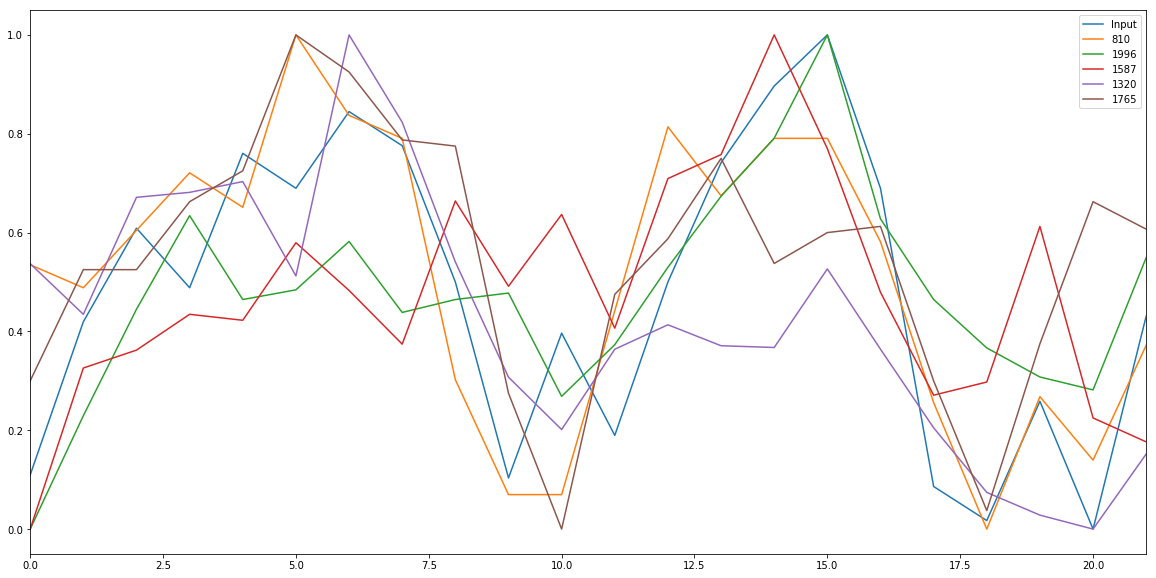

0.47058823529411764 51.0
0.47058823529411764 51.0
TARGET 0.6666666666666666 0.0 [-0.00388623]


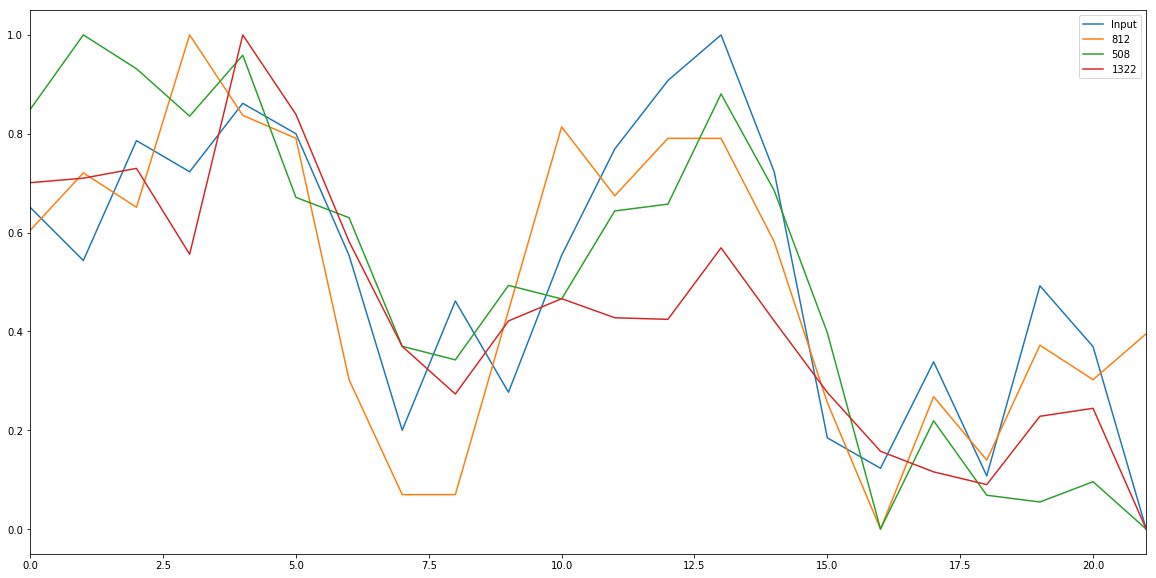

0.46153846153846156 52.0
TARGET 0.75 0.0 [-0.00224014]


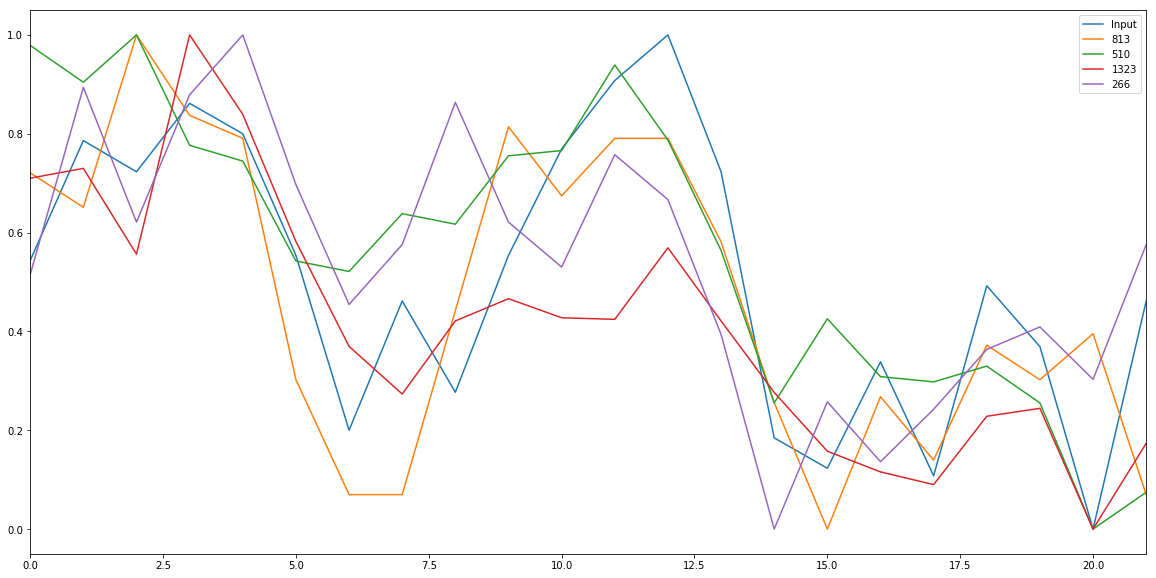

0.4528301886792453 53.0
TARGET 0.8 0.2 [-0.00528342]


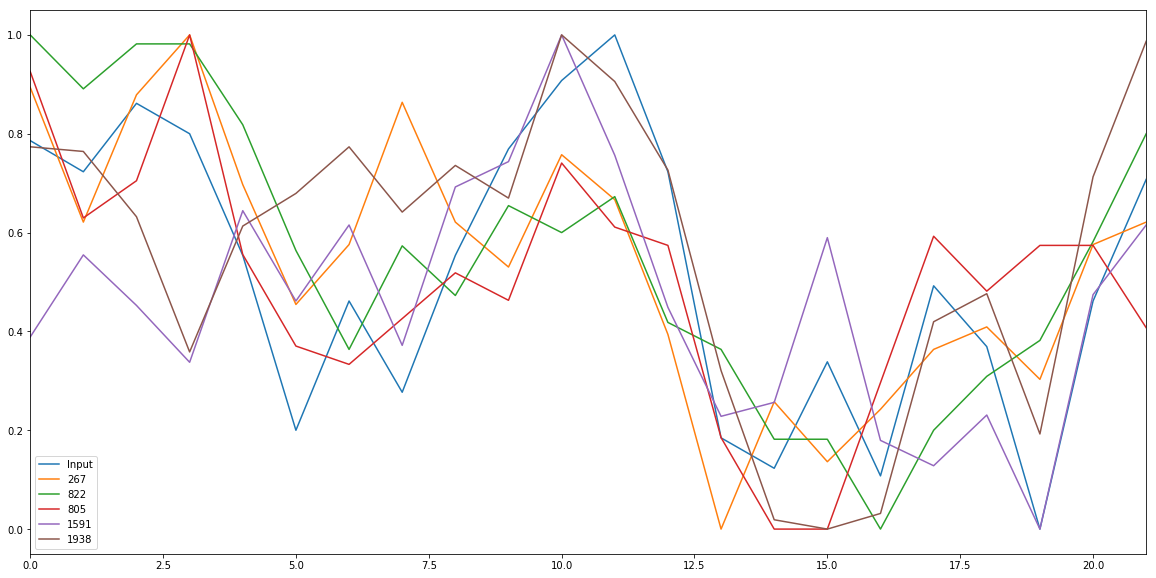

0.4444444444444444 54.0
TARGET 0.6 0.4 [-0.0084996]


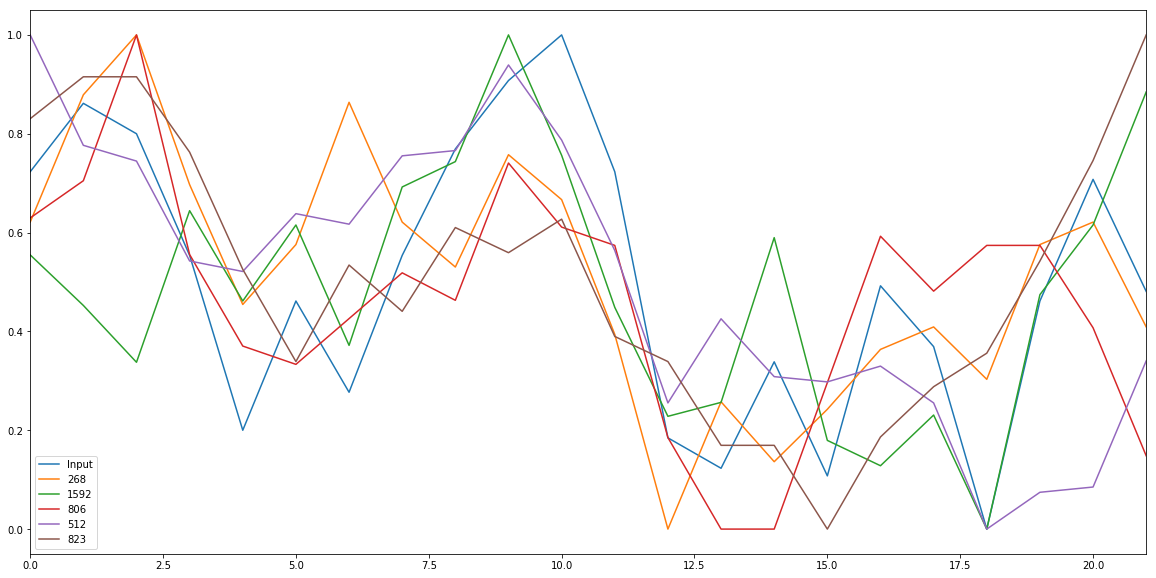

0.43636363636363634 55.0
TARGET 0.75 0.0 [-0.00671081]


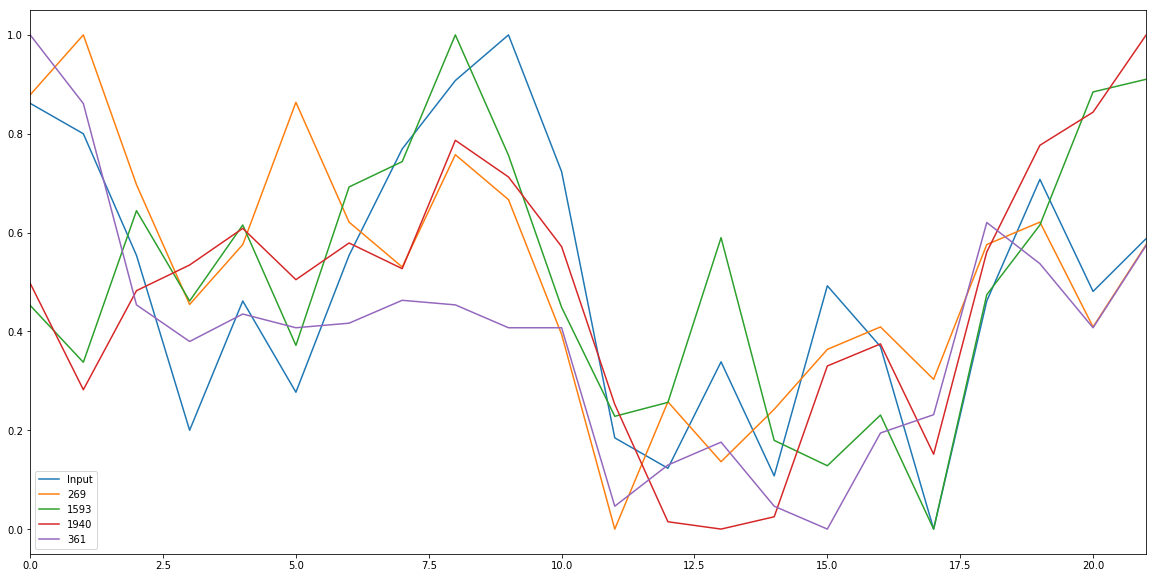

0.42857142857142855 56.0


KeyboardInterrupt: 

In [116]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
correct = 0.0
wrong = 0.0
stats = []
i = 2200
while i < 2500:
    thisTable = pd.DataFrame(np.array(xVals[i]), columns=["Input"])
    closest = nn.kneighbors([xVals[i]])
    keptNeighbors = ensureNoShifts(closest[1][0])
    predictions = []
    for sampleIndex in keptNeighbors:
        predictions.append(yVals[sampleIndex])
        thisTable = thisTable.join(pd.DataFrame(np.array(xVals[sampleIndex]), columns=[str(sampleIndex)]))
    predictions = np.array(predictions)
    guessUp = len(predictions[predictions>minSwingToCount])/float(len(predictions))
    guessDown = len(predictions[predictions<-minSwingToCount])/float(len(predictions))
#     print("UP", guessUp, "Down", guessDown)
    if guessUp > 0.5 or guessDown > 0.5:
        if (guessUp > 0.5 and yVals[i] > 0.0) or (guessDown > 0.5 and yVals[i] < 0.0):
            correct += 1.0
        else:
            wrong += 1.0
        print("TARGET", guessUp, guessDown,  yVals[i])
        thisTable.plot(figsize=(20,10))
        plt.show()
    if correct + wrong > 0:
        print(correct/(correct + wrong), correct + wrong)
        stats.append(correct/(correct + wrong))
    i += 1
pd.DataFrame(np.array(stats)).plot(figsize=(20,10))
